In [2]:


from sklearn.model_selection import train_test_split 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier 
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import tree  

In [3]:
data = pd.DataFrame({
    'Precisão':['Alta','Media','Alta','Media','Baixa','Baixa'],
    'Velocidade':['Media','Baixa','Alta','Alta','Baixa','Media'],
    'Retrabalho':['Baixa','Alta','Baixa','Baixa','Alta','Alta'],
    'classif':['Alta Qualidade', 'Baixa Qualidade','Alta Qualidade','Alta Qualidade', 'Baixa Qualidade','Baixa Qualidade']
})

In [4]:
data['Precisão'] = data['Precisão'].map({'Baixa':0, 'Alta':2, 'Media':1})


Acurácia: 0.5
Precisão: 0.5


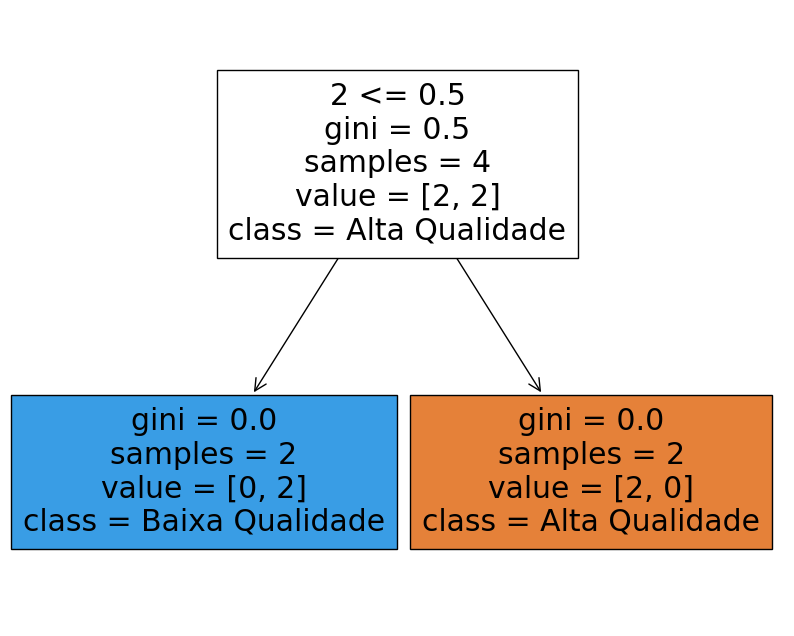

In [5]:

x=np.array(data['Precisão'])
y=np.array(data['classif']) 
x_treino,x_teste,y_treino,y_teste = train_test_split(x.reshape(-1,1),y.reshape(-1,1),
                                                     test_size=0.2,random_state=42)
model = DecisionTreeClassifier()
model.fit(x_treino,y_treino)
prev = model.predict(x_teste)
acurracy = accuracy_score(y_teste,prev)
precisao = precision_score(y_teste,prev,pos_label='Alta Qualidade')
matrix = confusion_matrix(y_teste,prev)
print(f'Acurácia: {acurracy}')
print(f'Precisão: {precisao}')
fig = plt.figure(figsize=(10,8))
tree.plot_tree(model,feature_names=x.tolist(),class_names=y.tolist(),filled=True)
plt.show()